In [1]:
import pandas as pd
soccer = pd.read_csv("soccer18-19.csv")
print(soccer.shape)
soccer.head(10)

(100, 23)


,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,E0,10/8/18,Man United,Leicester,2,1,H,1,0,H,...,6,4,11,8,2,5,2,1,0,0
1,E0,11/8/18,Bournemouth,Cardiff,2,0,H,1,0,H,...,4,1,11,9,7,4,1,1,0,0
2,E0,11/8/18,Fulham,Crystal Palace,0,2,A,0,1,A,...,6,9,9,11,5,5,1,2,0,0
3,E0,11/8/18,Huddersfield,Chelsea,0,3,A,0,2,A,...,1,4,9,8,2,5,2,1,0,0
4,E0,11/8/18,Newcastle,Tottenham,1,2,A,1,2,A,...,2,5,11,12,3,5,2,2,0,0
5,E0,11/8/18,Watford,Brighton,2,0,H,1,0,H,...,5,0,10,16,8,2,2,2,0,0
6,E0,11/8/18,Wolves,Everton,2,2,D,1,1,D,...,4,5,8,7,3,6,0,1,0,1
7,E0,12/8/18,Arsenal,Man City,0,2,A,0,1,A,...,3,8,11,14,2,9,2,2,0,0
8,E0,12/8/18,Liverpool,West Ham,4,0,H,2,0,H,...,8,2,14,9,5,4,1,2,0,0
9,E0,12/8/18,Southampton,Burnley,0,0,D,0,0,D,...,3,6,10,9,8,5,0,1,0,0


🗺️ **Explore**: What team commits the most fouls?

In [35]:
def TeamFouls(self):
    TeamFouls = {}
    for index, row in self.iterrows(): # iterate the rows, and add each team name in the dict
        for i in ['HomeTeam', 'AwayTeam']:
            if row[i] not in TeamFouls:
                TeamFouls.update({row[i]:[0]})
    
    for index, row in self.iterrows(): #iterate the rows
        TeamName = row['HomeTeam']
        TeamFouls[TeamName][0] += row['HF'] # add home fouls
    
        TeamName = row['AwayTeam']
        TeamFouls[TeamName][0] += row['AF'] # add away fouls
    #print(TeamFouls)
    #print(list([i[0],i[1]]) for i in TeamFouls.items())
    return pd.DataFrame.from_dict(TeamFouls)

TeamFouls(soccer)

,Man United,Leicester,Bournemouth,Cardiff,Fulham,Crystal Palace,Huddersfield,Chelsea,Newcastle,Tottenham,Watford,Brighton,Wolves,Everton,Arsenal,Man City,Liverpool,West Ham,Southampton,Burnley
0,124,105,90,102,113,114,112,92,124,117,120,136,122,114,127,85,101,102,118,100


📊 **Visualize**: Plot the percentage of games that ended in a draw over time.

In [37]:
soccer[soccer.HST == soccer.AST]

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
15,E0,18/08/2018,West Ham,Bournemouth,1,2,A,1,0,H,...,5,5,14,10,6,4,6,2,0,0
16,E0,19/08/2018,Brighton,Man United,3,2,H,3,1,H,...,3,3,16,13,3,5,1,1,0,0
24,E0,25/08/2018,Southampton,Leicester,1,2,A,0,0,D,...,5,5,13,11,10,3,1,1,1,0
29,E0,27/08/2018,Man United,Tottenham,0,3,A,0,0,D,...,5,5,11,16,5,2,2,4,0,0
30,E0,1/9/18,Brighton,Fulham,2,2,D,0,1,A,...,5,5,12,14,7,1,3,3,0,0
32,E0,1/9/18,Crystal Palace,Southampton,0,2,A,0,0,D,...,6,6,11,12,7,4,1,1,0,0
42,E0,15/09/2018,Huddersfield,Crystal Palace,0,1,A,0,1,A,...,2,2,11,17,5,3,1,2,0,0
44,E0,15/09/2018,Newcastle,Arsenal,1,2,A,0,0,D,...,2,2,13,11,10,4,0,0,0,0
47,E0,16/09/2018,Everton,West Ham,1,3,A,1,2,A,...,4,4,15,12,4,2,2,5,0,0
51,E0,22/09/2018,Burnley,Bournemouth,4,0,H,2,0,H,...,5,5,17,6,3,8,2,0,0,0


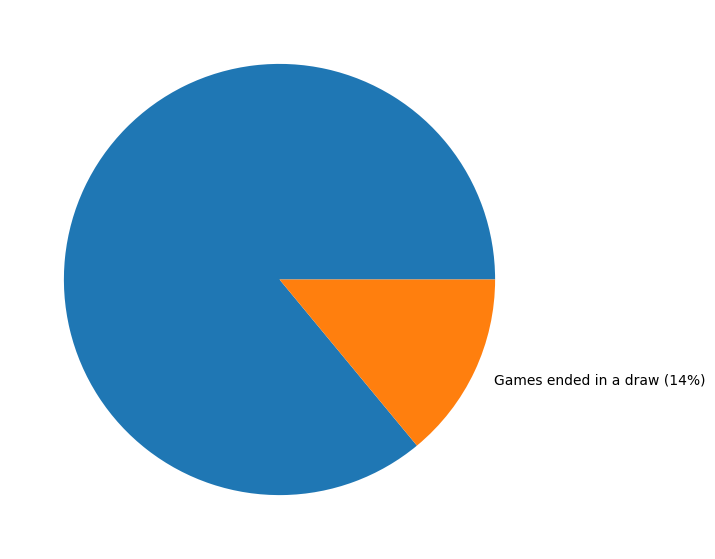

In [38]:
def percen_draw(soccer):
    from matplotlib import pyplot as plt
    draw_count = soccer[soccer.HST == soccer.AST].shape[0]
    total_count = soccer.shape[0]
    data = [total_count - draw_count, draw_count] # data in the pie chart
    labels = ['', 'Games ended in a draw ('+str(round(draw_count/total_count*100))+'%)']
    fig = plt.figure(figsize=(10, 7))
    plt.pie(data, labels = labels)

percen_draw(soccer)

🔎 **Analyze**: Does the number of red cards a team receives have an effect on its probability of winning a game?

In [44]:
def count_wins(soccer):
    count_wins = {}
    for index, row in soccer.iterrows(): # iterate the rows, and add each team name in the dict
        for i in ['HomeTeam', 'AwayTeam']:
            if row[i] not in count_wins:
                count_wins.update({row[i]:[0]})
                
    for index, row in soccer.iterrows(): # iterate the rows
        if row['HST'] > row['AST']:
            count_wins[row['HomeTeam']][0] += 1
        else:
            if row['HST'] < row['AST']:
                count_wins[row['AwayTeam']][0] += 1
    return pd.DataFrame.from_dict(count_wins)

count_wins(soccer)

,Man United,Leicester,Bournemouth,Cardiff,Fulham,Crystal Palace,Huddersfield,Chelsea,Newcastle,Tottenham,Watford,Brighton,Wolves,Everton,Arsenal,Man City,Liverpool,West Ham,Southampton,Burnley
0,6,5,5,3,1,4,2,8,2,5,7,0,5,6,4,9,8,1,3,2


In [49]:
def count_reds(soccer):
    count_reds = {}
    for index, row in soccer.iterrows(): # iterate the rows, and add each team name in the dict
        for i in ['HomeTeam', 'AwayTeam']:
            if row[i] not in count_reds:
                count_reds.update({row[i]:[0]})
    
    for index,row in soccer.iterrows():
        for i in ['HomeTeam', 'AwayTeam']:
            count_reds[row[i]][0] += row[i[0]+'R'] # if i = 'HomeTeam', find row['HR'], similar to i = 'AwayTeam'
    
    return pd.DataFrame.from_dict(count_reds)

count_reds(soccer)

,Man United,Leicester,Bournemouth,Cardiff,Fulham,Crystal Palace,Huddersfield,Chelsea,Newcastle,Tottenham,Watford,Brighton,Wolves,Everton,Arsenal,Man City,Liverpool,West Ham,Southampton,Burnley
0,2,3,1,1,1,1,1,0,1,0,1,0,0,2,0,0,0,1,1,0


In [94]:
count_reds(soccer)['Man United'].values[0]

2

In [112]:
def correlation(X,Y): # find the correlation of two data sets in lists(input: np array)
    if len(X)==len(Y):
        Sum_xy = sum((X-X.mean())*(Y-Y.mean()))
        Sum_x_squared = sum((X-X.mean())**2)
        Sum_y_squared = sum((Y-Y.mean())**2)       
        corr = Sum_xy / np.sqrt(Sum_x_squared * Sum_y_squared)
    return corr

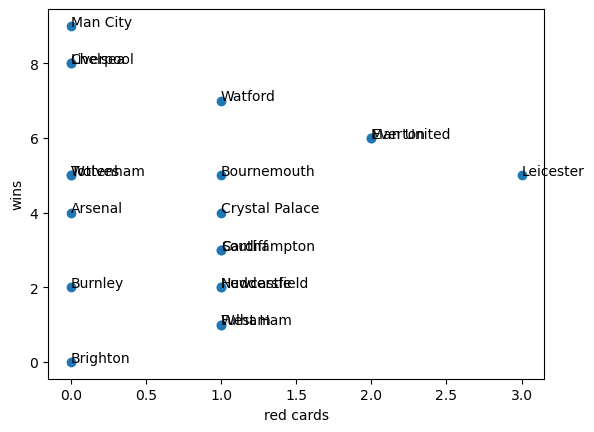

C:\Users\z69ding\AppData\Local\Temp\ipykernel_20056\3343871634.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  display(count_reds(soccer).append(count_wins(soccer)).assign(index=['reds','wins']).set_index('index'))


,Man United,Leicester,Bournemouth,Cardiff,Fulham,Crystal Palace,Huddersfield,Chelsea,Newcastle,Tottenham,Watford,Brighton,Wolves,Everton,Arsenal,Man City,Liverpool,West Ham,Southampton,Burnley
index,,,,,,,,,,,,,,,,,,,,
reds,2,3,1,1,1,1,1,0,1,0,1,0,0,2,0,0,0,1,1,0
wins,6,5,5,3,1,4,2,8,2,5,7,0,5,6,4,9,8,1,3,2


correlation factor: -0.04446


In [138]:
def plot_reds_wins(soccer):# plot the scatters of reds and wins of each team
    from matplotlib import pyplot as plt
    import numpy as np
    teams = list(count_reds(soccer).keys())
    x = [0]*len(teams)
    y = [0]*len(teams)
    #y_len = count_wins(soccer).shape[0]
    #x_len = count_reds(soccer).shape[0]
    for i in range(len(teams)):
        x[i] = count_reds(soccer)[teams[i]].values[0]
        y[i] = count_wins(soccer)[teams[i]].values[0]
    fig = plt.figurefigsize=((10,7))
    plt.scatter(x,y)
    for i in range(len(teams)):
        plt.text(x[i],y[i],teams[i])
    plt.xlabel('red cards')
    plt.ylabel('wins')
    plt.show()
    #print(f'reds:{x}')
    #print(f'wins:{y}')
    ##============change index===========
    index = ['reds', 'wins']
    display(count_reds(soccer).append(count_wins(soccer)).assign(index=['reds','wins']).set_index('index'))
    ##====================================
    print(f'correlation factor: {round(correlation(np.array(x),np.array(y)),5)}')
plot_reds_wins(soccer)

In [118]:
import numpy as np
np.array([0,0,0])

array([0, 0, 0])

C:\Users\z69ding\AppData\Local\Temp\ipykernel_20056\3820316888.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  count_reds(soccer).append(count_wins(soccer))


,Man United,Leicester,Bournemouth,Cardiff,Fulham,Crystal Palace,Huddersfield,Chelsea,Newcastle,Tottenham,Watford,Brighton,Wolves,Everton,Arsenal,Man City,Liverpool,West Ham,Southampton,Burnley
0,2,3,1,1,1,1,1,0,1,0,1,0,0,2,0,0,0,1,1,0
0,6,5,5,3,1,4,2,8,2,5,7,0,5,6,4,9,8,1,3,2


In [80]:
[0] * 10

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [102]:
list(count_reds(soccer).to_dict().keys())

['Man United',
 'Leicester',
 'Bournemouth',
 'Cardiff',
 'Fulham',
 'Crystal Palace',
 'Huddersfield',
 'Chelsea',
 'Newcastle',
 'Tottenham',
 'Watford',
 'Brighton',
 'Wolves',
 'Everton',
 'Arsenal',
 'Man City',
 'Liverpool',
 'West Ham',
 'Southampton',
 'Burnley']

In [81]:
list(count_reds(soccer).to_dict().items())

[('Man United', {0: 2}),
 ('Leicester', {0: 3}),
 ('Bournemouth', {0: 1}),
 ('Cardiff', {0: 1}),
 ('Fulham', {0: 1}),
 ('Crystal Palace', {0: 1}),
 ('Huddersfield', {0: 1}),
 ('Chelsea', {0: 0}),
 ('Newcastle', {0: 1}),
 ('Tottenham', {0: 0}),
 ('Watford', {0: 1}),
 ('Brighton', {0: 0}),
 ('Wolves', {0: 0}),
 ('Everton', {0: 2}),
 ('Arsenal', {0: 0}),
 ('Man City', {0: 0}),
 ('Liverpool', {0: 0}),
 ('West Ham', {0: 1}),
 ('Southampton', {0: 1}),
 ('Burnley', {0: 0})]

In [73]:
list(count_reds(soccer).to_dict().items())[0][1][0]

2